# Main Experiment Results

## Setup

In [1]:
import pickle
from plotnine import *
from utils import produce_results_table, compute_friedman_posthocs, results_boxplot

## Data Import
Because the `pickle` file with results is more than 180 MB, it is temporarily stored in my [personal Google Drive directory](https://drive.google.com/file/d/1oWoh_zCbYyndqBhLT5eT7uVN8neEtVE-/view?usp=share_link).

**Please download the file to your working directory in order to proceed with results analysis!**


In [2]:
with open('./results/results_dict.pkl', 'rb') as f:
    loaded_results_dict = pickle.load(f)
    
results_wide, results_long = produce_results_table(loaded_results_dict)

print('Results in a wide data frame:')
results_wide.head()

Results in a wide data frame:


,df,def1,def2,hpo1,hpo2,ens,runtime
0,SET2,0.673304,0.559236,0.762374,0.675882,0.767482,361.431677
1,SET2,0.673304,0.567828,0.765481,0.653062,0.810868,350.669751
2,SET2,0.673304,0.558099,0.848504,0.532291,0.848504,355.538788
3,SET2,0.673304,0.580329,0.769031,0.675961,0.769027,354.429101
4,SET2,0.673304,0.593854,0.875742,0.676242,0.875742,353.085142


In [3]:
print('Results in a long data frame:')
results_long.head()

Results in a long data frame:


,df,model,ARI_M
0,SET2,DEF: KM,0.673304
1,SET2,DEF: KM,0.673304
2,SET2,DEF: KM,0.673304
3,SET2,DEF: KM,0.673304
4,SET2,DEF: KM,0.673304


## Friedman Test Results

In [4]:
stat_tests = compute_friedman_posthocs(results_wide)

for df_name in stat_tests.keys():
    
    print(df_name)
    print(f"Friedman X2: {round(stat_tests[df_name]['friedman_stat'],3)}(4), " 
          f"p = {stat_tests[df_name]['friedman_p']} ")
    print('Average ARI scores for ')
    print('[DEF KMeans, DEF STREAMKMeans, Best HPO Sil, Best HPO CHI, Ensemble]')
    print(f"{stat_tests[df_name]['M_ARI']}")
    print(stat_tests[df_name]['SD_ARI'])
    print() 

SET1
Friedman X2: 329.121(4), p = 0.0 
Average ARI scores for 
[DEF KMeans, DEF STREAMKMeans, Best HPO Sil, Best HPO CHI, Ensemble]
[0.828 0.801 0.986 0.938 0.995]
[0.    0.04  0.047 0.083 0.029]

SET2
Friedman X2: 354.0(4), p = 0.0 
Average ARI scores for 
[DEF KMeans, DEF STREAMKMeans, Best HPO Sil, Best HPO CHI, Ensemble]
[0.673 0.568 0.816 0.659 0.825]
[0.    0.022 0.048 0.042 0.039]

SET3
Friedman X2: 367.976(4), p = 0.0 
Average ARI scores for 
[DEF KMeans, DEF STREAMKMeans, Best HPO Sil, Best HPO CHI, Ensemble]
[0.316 0.293 0.644 0.171 0.655]
[0.    0.024 0.041 0.05  0.044]

SET4
Friedman X2: 368.538(4), p = 0.0 
Average ARI scores for 
[DEF KMeans, DEF STREAMKMeans, Best HPO Sil, Best HPO CHI, Ensemble]
[0.311 0.294 0.821 0.155 0.834]
[0.    0.023 0.038 0.013 0.038]

SET5
Friedman X2: 229.457(4), p = 0.0 
Average ARI scores for 
[DEF KMeans, DEF STREAMKMeans, Best HPO Sil, Best HPO CHI, Ensemble]
[0.361 0.404 0.276 0.295 0.253]
[0.015 0.044 0.053 0.145 0.05 ]

SET6
Friedman X2:

## Nemenyi Post-Hoc Test Results

In [5]:
for df_name in stat_tests.keys(): 
    print(df_name)
    print(stat_tests[df_name]['posthocs_ps'])
    print()
    

SET1
          def1      def2     hpo1      hpo2       ens
def1  1.000000  0.015044  0.00100  0.001000  0.001000
def2  0.015044  1.000000  0.00100  0.001000  0.001000
hpo1  0.001000  0.001000  1.00000  0.046990  0.900000
hpo2  0.001000  0.001000  0.04699  1.000000  0.010426
ens   0.001000  0.001000  0.90000  0.010426  1.000000

SET2
       def1   def2      hpo1   hpo2       ens
def1  1.000  0.001  0.001000  0.900  0.001000
def2  0.001  1.000  0.001000  0.001  0.001000
hpo1  0.001  0.001  1.000000  0.001  0.796217
hpo2  0.900  0.001  0.001000  1.000  0.001000
ens   0.001  0.001  0.796217  0.001  1.000000

SET3
          def1      def2     hpo1   hpo2      ens
def1  1.000000  0.003195  0.00100  0.001  0.00100
def2  0.003195  1.000000  0.00100  0.001  0.00100
hpo1  0.001000  0.001000  1.00000  0.001  0.02625
hpo2  0.001000  0.001000  0.00100  1.000  0.00100
ens   0.001000  0.001000  0.02625  0.001  1.00000

SET4
          def1      def2      hpo1   hpo2       ens
def1  1.000000  0.238822 

## Average Performances Boxplot

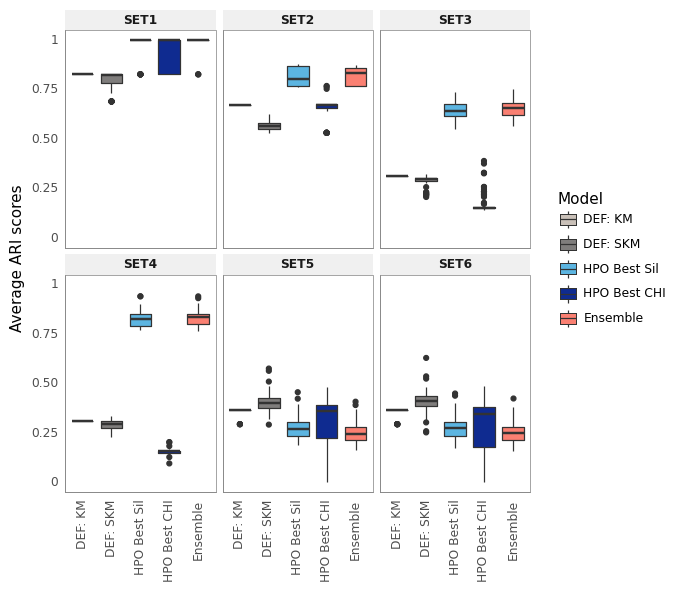

<ggplot: (671420230)>

In [6]:
fig = results_boxplot(results_long)
fig

In [8]:
ggsave(plot=fig, filename='./images/results_boxplots.png', dpi=300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6 x 6 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./images/results_boxplots.png
